<a href="https://colab.research.google.com/github/LLAlex85/CPP/blob/master/Tarea2Pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt

population = [8467513,3849297,2696555,2288250,1624569,1576251,1451853,1381611,1288457,983489,964177,954614,
              935508,906528,882039,879709,815201,733919,711463,687725,678851,678415,670050,654776,646790,641162,
              632464,628594,628127,576498,569330,562599,544510,543242,525041,509475,508394,496461,487300,483956,469124,457672,
              456062,439890,433823,425336,411401,407615,395699,392786,389347,387050,376971,367991,345940,345510,322178,322120,
              321793,317773,317261,309441,309154,309031,308935,307220,307193,300431,298263,293310,292657,288253,288121,285527,
              283927,279458,277220,276807,274133,273136,269196,268851,268508,265974,260993,258201,256153,254198,251269,250320,
              249630,242753,242035,237446,235089,229071,227514,226604,224593,222203,222185,220490,219205,218771,217523,216963,
              212031,211600,210761,210719,210606,209530,208778,205918,205617,204510,202690,201998,201879,201234,201196,200478,
              198665,197575,197416,197347,197106,197102,196652,196528,194917,192648,192366,192169,189692,189347,187831,184952,
              184587,184118,184021,182113,181668,179266,178997,177963,177723,176987,176938,175142,175096,172982,170957,170488,
              170150,169724,169391,168538,165761,162791,159827,159743,157794,157519,156762,156605,156261,154789,154706,154545,
              152258,152131,151901,151612,150665,150372,149761,149440,149191,149104,148626,148338,148333,148146,147711,147691,
              147088,146103,143920,143600,143014,142978,142610,141874,140398,139594,139110,138130,138070,137746,137571,137541,
              137264,136467,136309,135950,135732,135407,135081,135077,134835,133269,133251,132822,131325,128097,127358,127151,
              126853,126748,125990,125975,125963,125963,125944,125754,125070,124886,124074,123876,123436,122989,122942,122088,
              121771,121536,121465,120576,120019,119705,117643,117472,117445,117286,117145,117090,116674,116541,116486,116382,
              116330,115639,115595,115462,115425,115302,114794,114561,114086,114084,113994,113911,113811,113394,113103,112991,
              112944,112914,112684,112556,112483,112368,111666,111645,111348,110867,110846,110812,110750,109925,109796,109711,
              109373,109323,108575,108420,107697,107626,107192,107180,107017,107015,106966,106941,106907,106874,106633,106401,
              106186,105905,105834,105446,105432,105401,105181,105179,104882,104394,104175,103353,103212,103078,102988,102781,
              102483,102338,102200,102059,101733,101315,101243,101171,101119,101009,100971,100941,100843,100777,100758,100618,
              100373
];

rank = [x for x in range(1, len(population)+1)]


Plot rank vs population

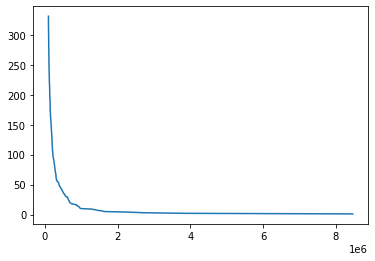

In [24]:
plt.plot(population, rank)

De acuerdo con [1] y [2] la población debería de seguir la distribución de pareto. Haciendo log a rank y a la población se debería de obtener una relación casi linenal. 

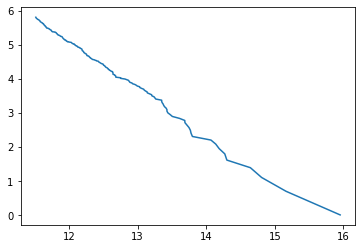

In [27]:
log_population = np.log(population)
#log_population = np.array(log_population, dtype=np.float64)
log_rank = np.log(rank)
#log_rank = np.array(log_rank, dtype=np.float64)

plt.plot(log_population, log_rank)

La gráfica anterior muestra una relación casi lineal de primer orden. 
Obtengamos los factores de dicha relación (m y b).

331 331 [-1.38550454 21.7100922 ]


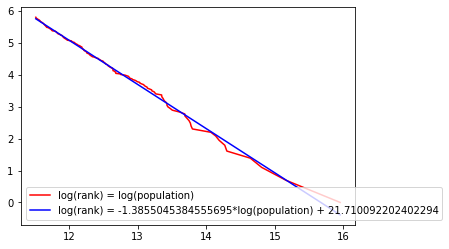

In [33]:
coeff = np.polyfit(log_population, log_rank, 1)
log_out = np.polyval(coeff,log_population)

plt.plot(log_population, log_rank, "r")
plt.plot(log_population, log_out, "b")
plt.legend(['log(rank) = log(population)', f"log(rank) = {coeff[0]}*log(population) + {coeff[1]}"]);

print(len(log_population), len(log_rank), coeff)

Dado:

R = A*(S ^-a)

log(R) = log(A) - alog(S)

In [44]:
a = -1*coeff[0]
A = np.exp(coeff[1])

print(f"Paretto Exponent is {a} and Constant is {A}")

Paretto Exponent is 1.3855045384555695 and Constant is 2682707016.333333


Por lo que para USA la ecuación para predecir de acuerdo a este modelo es:

Rank = 2682707016 * Population ^ (-1.3855045)

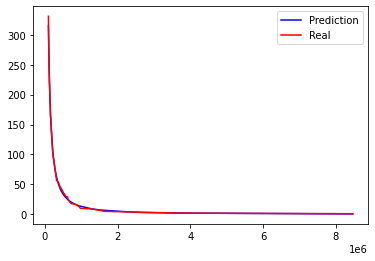

In [56]:
rank_prediction = A* population**(-a)
plt.plot(population, rank_prediction, "b")
plt.plot(population, rank, "r")
plt.legend(['Prediction', 'Real'])